In [1]:
%matplotlib notebook

import numpy as np
from scipy.integrate import solve_ivp
from numpy import pi
import matplotlib.pyplot as plt

from basics import *
from hybrid_matrix_elements import *
from atomic_physics import *

In [39]:
def zeeman_clock_shift(B: float, b_pol: float):
    """
    Computes the differential zeeman shift for the Cesium clock transition
    (|6S1/2;4,0> <--> |6S12;3,0>) for a given Magnetic field strength and direction
    Args:
        B : magnetic field strength (T)
        b_pol : SphericalVector object representing the direction of the bias field wrt the quantization axis
    Returns:
        clock_shift : the clock shift computed using 2nd order perturbation theory (Hz)
    """
    
    def zeeman_me(f,mf,fp,mfp):
        return zeeman_me_hf(B, b_pol, 0, 1/2, f, mf, 1/2, fp, mfp)/hb
    
    def clock_E(F):
        if F not in [3,4]:
            raise ValueError("Clock states are F=3,4")
        return 0 if F == 3 else cs_clock
    
    # 2nd order Non-degenerate PT doesn't work. We'll build the Hamiltonian explicitly
    def index(f,mf):
        """Returns an int representing the index for an |f,mf> pair in our Hamiltonian"""
        return (f - 3) * 7 + mf + f
    dim = 3*2+1+4*2+1
    H = np.zeros((dim,dim),dtype=complex)
    fs = [3,4]
    for f in fs:
        for m in np.arange(-f,f+1):
            for fp in fs:
                for mp in m+np.arange(-1,2):
                    if mp > fp:
                        continue
                    H[index(fp,mp),index(f,m)] = zeeman_me(f,m,fp,mp)
                    if [f,m] == [fp,mp]:
                        H[index(f,m),index(f,m)] += 2*pi*clock_E(f)
                        
    e_vals = np.sort(np.linalg.eigvals(H))
    clock_3_E = min(abs(e_vals))
    clock_4_E = min(abs(e_vals - 2*pi*cs_clock))
    return clock_4_E - clock_3_E - 2*pi*cs_clock

In [40]:
H = zeeman_clock_shift(1*gauss,SphericalVector([1,0,0]))
e_vals = sorted(np.linalg.eigvals(H))
print("[" + "\n ".join(f"{float(e_val)}" for e_val in e_vals) + "]")

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

<IPython.core.display.Javascript object>


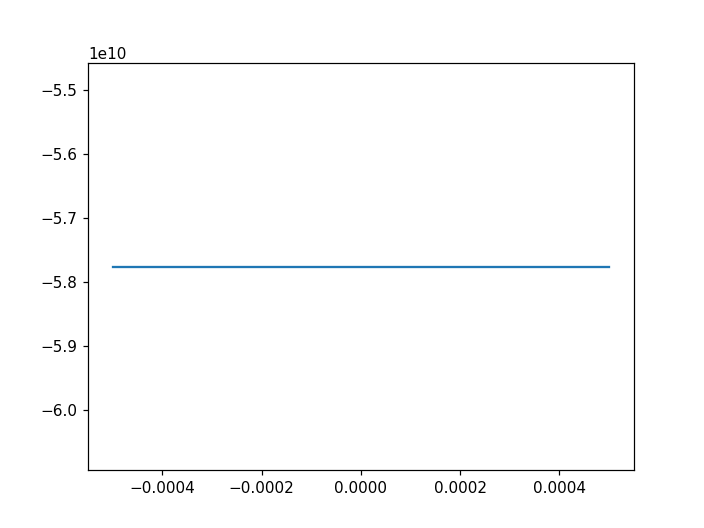

In [44]:
Bs = np.linspace(-5,5,100)*gauss
B_pol = SphericalVector([1,0,0])
fig,ax = plt.subplots(1,1)
shifts = [zeeman_clock_shift(B,B_pol) for B in Bs]
ax.plot(Bs,shifts)
fig.show()
# print(zeeman_clock_shift(1*gauss,SphericalVector([1,0,0])))

In [36]:
print(
    "["+"\n ".join([
        ",".join([f"{float(me):.1f}" for me in hrow])
    for hrow in H]) + "]"
)

[-6615061.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5824655.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
 0.0,-4410041.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7626264.7,0.0,0.0,0.0,0.0,0.0,0.0
 0.0,0.0,-2205020.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8526423.2,0.0,0.0,0.0,0.0,0.0
 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8806052.0,0.0,0.0,0.0,0.0
 0.0,0.0,0.0,0.0,2205020.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8526423.2,0.0,0.0,0.0
 0.0,0.0,0.0,0.0,0.0,4410041.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7626264.7,0.0,0.0
 0.0,0.0,0.0,0.0,0.0,0.0,6615061.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5824655.9,0.0
 0.0,0.0,0.0,0.0,0.0,0.0,0.0,57767800893.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
 -5824655.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57765602887.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
 0.0,-7626264.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57763404882.5,0.0,0.0,0.0,0.0,0.0,0.0
 0.0,0.0,-8526423.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57761206877.0,0.0,0.0,0.0,0.0,0.0
 0.0,0.0,0.0,-8806052.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57759008871.6,0.0,0.0,0.0,0.0
 0.0,0.0,0.0,0.0,-8526423.2,0.0,0.0,0.0,0.0,0.0,0.0,0.

<ipython-input-36-a0fd83d134b2>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  ",".join([f"{float(me):.1f}" for me in hrow])


In [6]:
m = 2
for mp in m+np.arange(-1,2):
    print(mp)

1
2
3
